In [195]:
import numpy as np
import pickle
from sklearn.preprocessing import scale,normalize
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import  Conv2D,AveragePooling2D ,MaxPooling2D ,Flatten ,Dense, Activation,Dropout,BatchNormalization
from keras.optimizers import SGD,Adam
from keras.utils import np_utils
import tensorflow as tf
np.random.seed(123)


In [196]:
# with open('train.pickle' , 'rb') as pf:
#     data = pickle.load(pf);
# with open('test.pickle' , 'rb') as pf:
#     data2 = pickle.load(pf);
# with open('valid.pickle' , 'rb') as pf:
#     data3 = pickle.load(pf);
with open('data0.pickle' , 'rb') as pf:
    data0 = pickle.load(pf);
data0['x_train'].shape


(86989, 3, 32, 32)

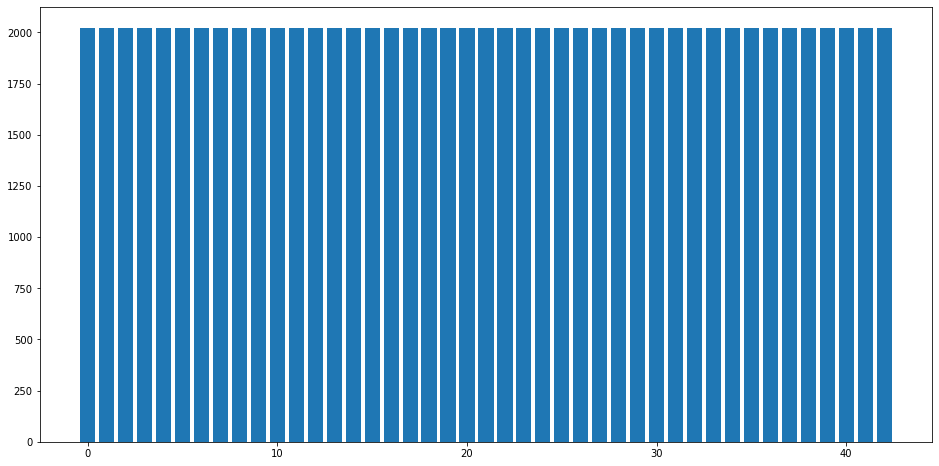

In [197]:
# Displaying the distribution of Data
num_of_samples=[]
for i in range(43):
    t1=[]
    for jx,j in enumerate(data0['y_train']):
        if i == j:
            t1.append(jx)
    num_of_samples.append(len(t1))
    
plt.figure(figsize=(16,8))
plt.bar(range(43),num_of_samples)
plt.show()
    

In [198]:

x_train = data0['x_train']
y_train = data0['y_train']
x_test = data0['x_test']
y_test = data0['y_test']
x_valid = data0['x_validation']
y_valid = data0['y_validation']

# edit the shape of input 
# ex : for training we convert (86989, 3, 32, 32) to (86989, 32, 32, 3)
x_train = x_train.transpose(0, 2, 3, 1)
x_test  = x_test.transpose(0, 2, 3, 1)
x_valid = x_valid.transpose(0, 2, 3, 1)

# convert target to onehot encoding
y_train = to_categorical(y_train, num_classes=43)
y_test = to_categorical(y_test, num_classes=43)
y_valid = to_categorical(y_valid, num_classes=43)

# convert input from RGB to Grayscale
x_train=np.sum(x_train/3, axis=3, keepdims=3)
x_test=np.sum(x_test/3, axis=3, keepdims=3)
x_valid=np.sum(x_valid/3, axis=3, keepdims=3)

# standardization
# standardize the input ( mean = 0 , std = 1 )
x_train=(x_train-x_train.mean())/x_train.std()
x_test=(x_test-x_test.mean())/x_test.std()
x_valid=(x_valid-x_valid.mean())/x_valid.std()

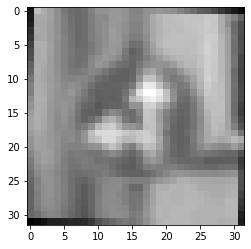

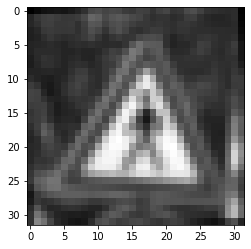

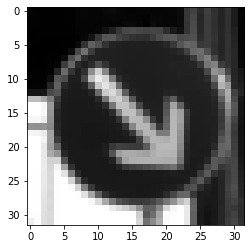

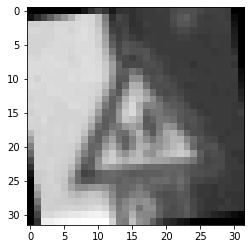

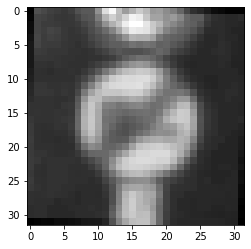

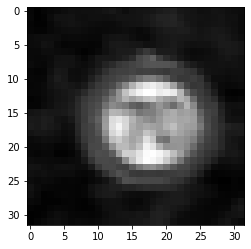

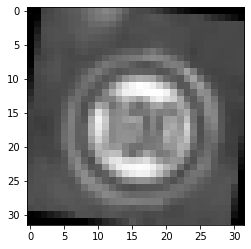

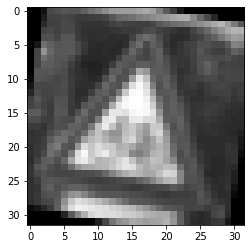

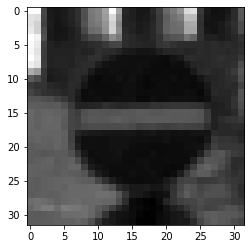

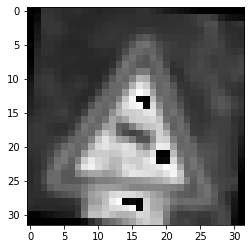

In [199]:
# showing some images 
for i in range(10):
    plt.figure()
    plt.imshow(x_train[i], cmap='gray')


In [269]:
# Building the model
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32,1)))
model.add(BatchNormalization())
model.add(AveragePooling2D(2,2))

model.add(Dropout(0.27))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(2,2))

model.add(Dropout(0.27))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(2,2))

model.add(Dropout(0.27))

model.add(Flatten())

model.add(Dense(120, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.27))

model.add(Dense(64, activation = 'relu'))

model.add(BatchNormalization())
model.add(Dropout(0.27))

model.add(Dense(43, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_129 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_79 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
average_pooling2d_129 (Avera (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_205 (Dropout)        (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_130 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_80 (Batc (None, 13, 13, 64)        256       
_________________________________________________________________
average_pooling2d_130 (Avera (None, 6, 6, 64)        

In [270]:
model_train = model.fit(x_train, y_train , shuffle = True ,batch_size = 50,epochs = 50 , validation_data = (x_valid,y_valid))

Epoch 1/50
1740/1740 [==============================] - 80s 46ms/step - loss: 2.2562 - accuracy: 0.4198 - val_loss: 0.1817 - val_accuracy: 0.9454
Epoch 2/50
1740/1740 [==============================] - 79s 46ms/step - loss: 0.3058 - accuracy: 0.9096 - val_loss: 0.1114 - val_accuracy: 0.9671
Epoch 3/50
1740/1740 [==============================] - 82s 47ms/step - loss: 0.1895 - accuracy: 0.9439 - val_loss: 0.0741 - val_accuracy: 0.9796
Epoch 4/50
1740/1740 [==============================] - 80s 46ms/step - loss: 0.1403 - accuracy: 0.9584 - val_loss: 0.0699 - val_accuracy: 0.9828
Epoch 5/50
1740/1740 [==============================] - 82s 47ms/step - loss: 0.1298 - accuracy: 0.9612 - val_loss: 0.0640 - val_accuracy: 0.9796
Epoch 6/50
1740/1740 [==============================] - 79s 46ms/step - loss: 0.1124 - accuracy: 0.9669 - val_loss: 0.0527 - val_accuracy: 0.9866
Epoch 7/50
1740/1740 [==============================] - 80s 46ms/step - loss: 0.1021 - accuracy: 0.9699 - val_loss: 0.0492 -

In [271]:
# calculate the loss and accuracy for test  
score = model.evaluate(x_test,y_test)
print('Test Accuracy is : {}'.format(score[1]))

395/395 [==============================] - 2s 6ms/step - loss: 0.0835 - accuracy: 0.9778
Test Accuracy is : 0.9777513742446899


In [272]:
accuracy     = model_train.history['accuracy']
val_accuracy = model_train.history['val_accuracy']
loss         = model_train.history['loss']
val_loss     = model_train.history['val_loss']

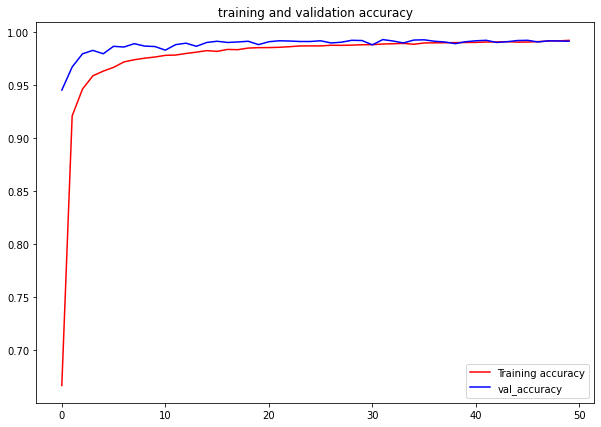

In [277]:
# Plot accuracy curve
plt.figure(figsize=(10,7))
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'val_accuracy')
plt.title("training and validation accuracy")
plt.legend()

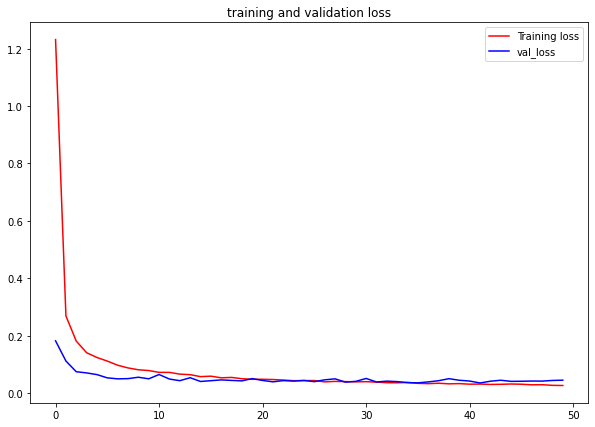

In [278]:
# Plot loss curve
plt.figure(figsize=(10,7))
plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'val_loss')
plt.title("training and validation loss")
plt.legend()